# Variational Autoencoder -  Aerial Images Simulation

## General Imports

In [1]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import numpy as np
from torchvision.utils import save_image
from torch.utils.tensorboard import SummaryWriter
from torchvision.utils import make_grid

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


__Write to tensorboard__

In [3]:
writer = SummaryWriter('experiments/experiment_vae')

## Helper Functions

In [ ]:
def conv2d_output_dimensions(width_in, height_in, input_channels, kernel_size, kernel_filters, padding=0, stride=1):
    width_out = ((width_in - kernel_size + (2 * padding)) / stride) + 1
    height_out = ((height_in - kernel_size + (2 * padding)) / stride) + 1
    output_channels = kernel_filters
    
    return width_out, height_out, output_channels

In [ ]:
def maxpool_output_dimensions(width_in, height_in, input_channels, kernel_size, kernel_filters, padding=0, stride=1, dilation=1):
    width_out = ((width_in - (dilation * kernel_size) + (2 * padding)) / stride) + 1
    height_out = ((height_in - (dilation * kernel_size) + (2 * padding)) / stride) + 1
    output_channels = input_channels
    
    return width_out, height_out, output_channels

In [ ]:
def convTranspose2d_dim(width_in, height_in, input_channels, kernel_size, kernel_filters, padding=0, stride=1):
    output_channels = kernel_filters
    width_out = stride * (width_in - 1) + kernel_size - (2 * padding)
    height_out = stride * (height_in - 1) + kernel_size - (2 * padding)
    
    return width_out, height_out, output_channels

In [ ]:
def conv2d_output_dimensions_pytorch(width_in, height_in, input_channels, kernel_size, kernel_filters, padding=0, stride=1, dilation=1):
    width_out = ((width_in - (dilation * (kernel_size - 1)) + (2 * padding) - 1) / stride) + 1
    height_out = ((height_in - (dilation * (kernel_size - 1))  + (2 * padding) - 1) / stride) + 1
    output_channels = kernel_filters
    
    return width_out, height_out, output_channels

In [ ]:
def convTranspose2d_dim__pytorch(width_in, height_in, input_channels, kernel_size, kernel_filters, padding=0, stride=1, dilation=1, output_pad=0):
    output_channels = kernel_filters
    width_out = stride * (width_in - 1) + (dilation * (kernel_size - 1)) - (2 * padding) + output_pad + 1
    height_out = stride * (height_in - 1) + (dilation * (kernel_size - 1)) - (2 * padding) + output_pad + 1
    
    return width_out, height_out, output_channels

## Resnet dimension computation

### Test residual blocks

Test Input and output dimensions for residual blocks

In [ ]:
conv2d_output_dimensions(121, 121, 3, 3, 32, stride=2, padding=1)

In [ ]:
conv2d_output_dimensions(61, 61, 3, 3, 32, stride=1, padding=1)

In [ ]:
conv2d_output_dimensions(121, 121, 3, 1, 32, stride=2, padding=0)

### Aerial Images 120x120 Encoder

#### Input

In [ ]:
conv2d_output_dimensions(121, 121, 3, 5, 32, stride=1, padding=2)

#### Residual Block 1

In [ ]:
conv2d_output_dimensions(121, 121, 3, 3, 32, stride=2, padding=1)

In [ ]:
conv2d_output_dimensions(61, 61, 32, 3, 32, stride=1, padding=1)

In [ ]:
conv2d_output_dimensions(121, 121, 3, 1, 32, padding=0, stride=2)

#### Residual Block 2

In [ ]:
conv2d_output_dimensions(61, 61, 32, 3, 64, stride=2, padding=1)

In [ ]:
conv2d_output_dimensions(31, 31, 64, 3, 64, stride=1, padding=1)

In [ ]:
conv2d_output_dimensions(61, 61, 32, 1, 64, stride=2, padding=0)

#### Residual Block 3

In [ ]:
conv2d_output_dimensions(31, 31, 64, 3, 128, stride=2, padding=1)

In [ ]:
conv2d_output_dimensions(16, 16, 128, 3, 128, stride=1, padding=1)

In [ ]:
conv2d_output_dimensions(31, 31, 64, 1, 128, stride=2, padding=0)

### Aerial Images 120x120 Encoder Pytorch

In [ ]:
conv2d_output_dimensions_pytorch(121, 121, 3, 6, 32, stride=1, padding=2)

In [ ]:
conv2d_output_dimensions_pytorch(120, 120, 32, 4, 32, stride=2, padding=1)

In [ ]:
conv2d_output_dimensions_pytorch(61, 61, 32, 4, 32, stride=1, padding=1)

In [ ]:
conv2d_output_dimensions_pytorch(120, 120, 32, 2, 32, stride=2, padding=0)

### Aerial Images 120x120 Decoder Pytorch

In [ ]:
convTranspose2d_dim__pytorch(15, 15, 128, 4, 128, padding=1, stride=1)

In [ ]:
convTranspose2d_dim__pytorch(16, 16, 128, 4, 64, padding=2, stride=2)

In [ ]:
convTranspose2d_dim__pytorch(30, 30, 64, 4, 64, padding=1, stride=1)

In [ ]:
convTranspose2d_dim__pytorch(31, 31, 64, 4, 32, padding=2, stride=2)

In [ ]:
convTranspose2d_dim__pytorch(60, 60, 32, 4, 32, padding=1, stride=1)

In [ ]:
convTranspose2d_dim__pytorch(61, 61, 32, 4, 32, padding=2, stride=2)

In [ ]:
convTranspose2d_dim__pytorch(120, 120, 32, 4, 3, padding=1, stride=1)

### Aerial Images 120x120 Decoder

In [ ]:
convTranspose2d_dim(16, 16, 128, 4, 128, padding=1, stride=1)

In [ ]:
convTranspose2d_dim(17, 17, 128, 4, 64, padding=2, stride=2)

In [ ]:
convTranspose2d_dim(32, 32, 64, 3, 64, padding=1, stride=1)

In [ ]:
convTranspose2d_dim(32, 32, 64, 3, 32, padding=2, stride=2)

In [ ]:
convTranspose2d_dim(61, 61, 32, 3, 32, padding=1, stride=1)

In [ ]:
convTranspose2d_dim(67, 67, 32, 3, 32, padding=2, stride=2)

In [ ]:
convTranspose2d_dim(119, 119, 32, 6, 3, padding=2, stride=1)

## Project Configs

In [4]:
# number of subprocesses to use for data loading
num_workers = 10
# how many samples per batch to load
batch_size = 32
# Learning rate
learning_rate = 1e-4
# epochs
epochs = 50

log_interval = 100

## Custom Dataset Class

In [5]:
import pandas as pd
from torch.utils.data import Dataset 
import cv2
import os
import glob
import torch
from skimage import io
import random
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import PIL
import matplotlib.pyplot as plt
import numpy as np

In [6]:
print(cv2.__version__)

4.4.0


In [7]:
root_dir = "../data/drone_racing_50k"
root_dir_images = "../data/drone_racing_50k/images"

### Test pandas df

In [ ]:
annotations = pd.read_csv("../data/drone_racing_50k/gate_training_data.csv")

In [ ]:
annotations

In [ ]:
annotations.iloc[0, 0]

In [ ]:
values = annotations.iloc[0, 0].split()
values

In [ ]:
values_number = [float(i) for i in values]
values_number

In [ ]:
values_tensor = torch.Tensor(values_number)
values_tensor

In [ ]:
type(values_tensor)

In [ ]:
annotations.iloc[1, 0]

### Check Images Directory

In [8]:
images_list = glob.glob(os.path.join(root_dir_images, '*.png'))
images_list.sort()
images_list[555]

'../data/drone_racing_50k/images/00555.png'

In [9]:
os.path.join(root_dir, 'images')

'../data/drone_racing_50k/images'

### Build Custom Dataset Class

In [10]:
class DroneRacingDataset(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations_path = os.path.join(root_dir, csv_file)
        self.annotations = pd.read_csv(self.annotations_path)
        self.root_dir = root_dir
        self.root_dir_images = os.path.join(root_dir, 'images')
        self.transform = transform
        self.images_list = glob.glob(os.path.join(root_dir_images, '*.png'))
        self.images_list.sort()
        self.transform = transform

    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        #############
        # get label #
        #############
        label_str_values = self.annotations.iloc[index, 0].split()
        values_number = [float(i) for i in label_str_values]
        label = torch.Tensor(values_number)
        
        #############
        # get image #
        #############
        # get image path
        img_path = images_list[index]

        # read image with opencv
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)

        # convert from BGR (opencv default) to RGB format
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # convert to PIL image for transformations
        image = PIL.Image.fromarray(image) 

        if self.transform:
            image = self.transform(image)

        return (image, label)

### Instantiate Custom Dataset

In [11]:
root_dir = "../data/drone_racing_50k"

__Dataset Image details__

Images size is: 120 x 120

To match the required input from the Neural Networks (our customized Resnet-8), we convert our image to 121 x 121 size

In [12]:
# Prepare Image Transforms
transform=transforms.Compose([
                            transforms.Pad((0, 0, 1, 1), fill=0, padding_mode='edge'),
                            transforms.ToTensor()
                            ])

In [13]:
dataset = DroneRacingDataset('gate_training_data.csv', root_dir, transform=transform)

### Build Dataset Samplers

In [14]:
dataset_len = len(dataset)
dataset_len

50000

In [15]:
valid_size = 0.2

In [16]:
indices = list(range(dataset_len))
# indices
random.shuffle(indices)
# indices
split = int(np.floor(valid_size * dataset_len))
train_idx, valid_idx = indices[split:], indices[:split]
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


### Dataloaders 50k

In [17]:
# prepare data loaders
train_loader = DataLoader(dataset, 
                          batch_size=batch_size,
                          sampler=train_sampler,
                          num_workers=num_workers)

test_loader = DataLoader(dataset,
                         batch_size=batch_size,
                         sampler=valid_sampler,
                         num_workers=num_workers)


#### Show a sample

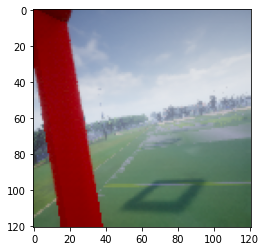

In [18]:
dataiter = iter(train_loader)
batch_data, labels = dataiter.next()

batch_image = batch_data[0]
image_tensor = batch_image

# create grid of images
img_grid = make_grid(batch_data)

image_numpy = image_tensor.numpy()
image_numpy.shape

image_reshaped = np.rollaxis(image_numpy,0,3)
image_reshaped.shape

img = np.array(image_reshaped)

plt.imshow(img)
plt.show()

# write to tensorboard
writer.add_image('grid_aerial_images', img_grid)

In [19]:
batch_data.size()

torch.Size([32, 3, 121, 121])

### Data Loaders 1k

In [ ]:
root_train = "../data/drone_image_data_1k/Training"
root_test = "../data/drone_image_data_1k/Test"

In [ ]:
transform=transforms.Compose([
                            transforms.Pad((0, 0, 1, 1), fill=0, padding_mode='edge'),
                            transforms.ToTensor()
                            ])


In [ ]:
train_loader = torch.utils.data.DataLoader(datasets.ImageFolder(root_train, transform=transform),
                                           batch_size=batch_size,
                                           num_workers=num_workers,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.ImageFolder(root_test, transform=transform),
                                          batch_size=batch_size,
                                          num_workers=num_workers,
                                          shuffle=True)

In [ ]:
# create iterator
dataiter = iter(train_loader)
# Get batch samples and labels
batch_images, batch_labels = dataiter.next()

# batch_images_samples = batch_images.to(device)
# batch_labels_samples = batch_labels.to(device)

In [ ]:
batch_images, batch_labels = dataiter.next()

In [ ]:
batch_images.shape

In [ ]:
batch_images[0].shape

## Models

### My Dronet Pytorch Implementation

In [20]:
class Dronet(nn.Module):
    def __init__(self, output_dim=64):
        super(Dronet, self).__init__()
        # super().__init__(img_dims, img_channels, output_dim)       
        # Input layer
        self.conv0 = nn.Conv2d(3, 32, kernel_size=6, stride=1, padding=2)
        
        ##########################
        # Residual Block Layer 1 #
        ##########################
        self.bn1_1 = nn.BatchNorm2d(32)
        self.conv1_1 = nn.Conv2d(32, 32, kernel_size=4, stride=2, padding=1)
        
        self.bn1_2 = nn.BatchNorm2d(32)
        self.conv1_2 = nn.Conv2d(32, 32, kernel_size=4, stride=1, padding=1)
        
        self.conv1_res_down = nn.Conv2d(32, 32, kernel_size=2, stride=2, padding=0)
        
        ##########################
        # Residual Block Layer 2 #
        ##########################
        self.bn2_1 = nn.BatchNorm2d(32)
        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1)
        
        self.bn2_2 = nn.BatchNorm2d(64)
        self.conv2_2 = nn.Conv2d(64, 64, kernel_size=4, stride=1, padding=1)
        
        self.conv2_res_down = nn.Conv2d(32, 64, kernel_size=2, stride=2, padding=0)
        
        ##########################
        # Residual Block Layer 3 #
        ##########################
        self.bn3_1 = nn.BatchNorm2d(64)
        self.conv3_1 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        
        self.bn3_2 = nn.BatchNorm2d(128)
        self.conv3_2 = nn.Conv2d(128, 128, kernel_size=4, stride=1, padding=1)
        
        self.conv3_res_down = nn.Conv2d(64, 128, kernel_size=2, stride=2, padding=0)
        
        # Flatten layer
        # self.flatten = nn.Flatten(16 * 16 * 128)
        
        self.dropout1 = nn.Dropout(p=0.5)
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(15 * 15 * 128, 128)
        self.fc2 = nn.Linear(128, output_dim)
        # self.fc2 = nn.Linear(128, 64)
        # self.fc3 = nn.Linear(64, output_dim)
        
    def forward(self, x):
        # Input
        x0 = self.conv0(x)
        
        ##########################
        # Residual Block Layer 1 #
        ##########################
        x1 = self.bn1_1(x0)
        x1 = F.relu(x1)
        x1 = self.conv1_1(x1)
        
        # padding
        x1 = F.pad(x1, (0,1,0,1), mode='replicate')
        
        x1 = self.bn1_2(x1)
        x1 = F.relu(x1)
        x1 = self.conv1_2(x1)
        # print("conv2 shape:")
        # print(x1.shape)
        
        x2 = self.conv1_res_down(x0)
        
        res1out = torch.add(x1, x2)
        
        ##########################
        # Residual Block Layer 2 #
        ##########################
        x1 = self.bn2_1(res1out)
        x1 = F.relu(x1)
        x1 = self.conv2_1(x1)
        
        # padding
        x1 = F.pad(x1, (0,1,0,1), mode='replicate')
        
        x1 = self.bn2_2(x1)
        x1 = F.relu(x1)
        x1 = self.conv2_2(x1)
        
        x2 = self.conv2_res_down(res1out)
        
        res2out = torch.add(x1, x2)
        
        ##########################
        # Residual Block Layer 3 #
        ##########################
        x1 = self.bn3_1(res2out)
        x1 = F.relu(x1)
        x1 = self.conv3_1(x1)
        
        # padding
        x1 = F.pad(x1, (0,1,0,1), mode='replicate')
        
        x1 = self.bn3_2(x1)
        x1 = F.relu(x1)
        x1 = self.conv3_2(x1)

        x2 = self.conv3_res_down(res2out)

        res3out = torch.add(x1, x2)

        
        # Flatten
        x = res3out.view(-1, 15 * 15 * 128)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        output = self.fc2(x)
        # print("conv_res shape:")
        # print(output.shape)
        # print("")
        # x = self.fc2(x)
        # output = self.fc3(x)

        return output

In [21]:
model = Dronet()
model

Dronet(
  (conv0): Conv2d(3, 32, kernel_size=(6, 6), stride=(1, 1), padding=(2, 2))
  (bn1_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_1): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn1_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv1_res_down): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
  (bn2_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_1): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn2_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_2): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv2_res_down): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
  (bn3_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (co

### Decoder

In [22]:
class ImageDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Decoder
        self.convT1 = nn.ConvTranspose2d(128, 128, kernel_size=4, stride=1, padding=1)
        self.convT2 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=2)
        
        self.convT3 = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=1, padding=1)
        self.convT4 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=2)
        
        self.convT5 = nn.ConvTranspose2d(32, 32, kernel_size=4, stride=1, padding=1)
        self.convT6 = nn.ConvTranspose2d(32, 32, kernel_size=4, stride=2, padding=2)
        
        self.convT7 = nn.ConvTranspose2d(32, 3, kernel_size=4, stride=1, padding=1)
    
    def forward(self, x):
        x = x.view(-1, 128, 15, 15)
        x = self.convT1(x)
        x = F.relu(x)
        x = self.convT2(x)
        x = F.relu(x)
        x = self.convT3(x)
        x = F.relu(x)
        x = self.convT4(x)
        x = F.relu(x)
        x = self.convT5(x)
        x = F.relu(x)
        x = self.convT6(x)
        x = F.relu(x)
        x = self.convT7(x)
        
        return x

In [23]:
decoder = ImageDecoder()
decoder

ImageDecoder(
  (convT1): ConvTranspose2d(128, 128, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (convT2): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
  (convT3): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (convT4): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
  (convT5): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (convT6): ConvTranspose2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
  (convT7): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
)

### VAE Aerial Images

In [24]:
class AerialImagesVAE(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.q_img = Dronet()

        # Latent vectors mu and sigma
        self.fc1 = nn.Linear(64,64)
        self.fc2 = nn.Linear(64,64)

        # Sampling vector
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 15 * 15 * 128)

        # Decoder
        self.p_img = ImageDecoder()


    def reparameterize(self, mu, logvar):
        std = logvar.mul(0.5).exp_()
        eps = std.data.new(std.size()).normal_()
        z = eps.mul(std).add_(mu)

        return z

    def sampler(self, z):
        sampling = self.fc3(z)
        up_sampling = self.fc4(sampling)
        return up_sampling

    def forward(self, x):
        x = self.q_img(x)

        mu = self.fc1(x)
        logvar = self.fc2(x)

        z = self.reparameterize(mu, logvar)

        up_sampling = self.sampler(z)
        
        img = self.p_img(up_sampling)

        return img, mu, logvar


#### Model Summary and write to Tensorboard

In [25]:
model = AerialImagesVAE()
model

AerialImagesVAE(
  (q_img): Dronet(
    (conv0): Conv2d(3, 32, kernel_size=(6, 6), stride=(1, 1), padding=(2, 2))
    (bn1_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_1): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn1_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (conv1_res_down): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
    (bn2_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2_1): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn2_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2_2): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (conv2_res_down): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (bn3_1): BatchNorm2d(64, eps=1e-05, moment

In [26]:
writer.add_graph(model, batch_data)
writer.close()

/home/farnez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
/home/farnez/Projects/UncertaintyDNN/lib/python3.6/site-packages/torch/jit/__init__.py:1044: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Not within tolerance rtol=1e-05 atol=1e-05 at input[29, 2, 51, 78] (0.05167517066001892 vs. 0.04826386272907257) and 1383640 other locations (98.00%)
  check_tolerance, _force_outplace, True, _module_class)


### Loss Function

In [27]:
class VAE_Loss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")

    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

## Training & Testing

### Model, Loss Function, and Optimizaer Instances

In [28]:
model = AerialImagesVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
VAE_Loss = VAE_Loss()

### Training

In [29]:
test_losses = []
train_losses = []

In [30]:
def train(epoch):
    model.train()
    train_loss = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = VAE_Loss(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data),
                                                                           len(train_loader.sampler),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item() / len(data)))

    
    average_epoch_loss = train_loss / (len(train_loader) * train_loader.batch_size)
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, average_epoch_loss))
    train_losses.append(average_epoch_loss)
    writer.add_scalar('Training Epoch Avg. Loss', average_epoch_loss, epoch)

    return average_epoch_loss

In [31]:
def test(epoch):
    
    model.eval()
    test_loss = 0
    
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += VAE_Loss(recon_batch, data, mu, logvar).item()
            
            if i == 0:

                n = min(data.size(0), 8)

                comparison = torch.cat([data[:n],
                                        recon_batch.view(batch_size, 3, 121, 121)[:n]])

                save_image(comparison.cpu(),
                           'results/air_scene_reconstruction_' + str(epoch) + '.png', nrow=n)

    average_epoch_test_loss = test_loss / ((len(test_loader) - 1) * test_loader.batch_size)

    print('====> Test set epoch loss: {:.4f}'.format(average_epoch_test_loss))
    
    test_losses.append(average_epoch_test_loss)
    writer.add_scalar('Test Epoch Avg. Loss', average_epoch_test_loss, epoch)
    return average_epoch_test_loss

In [32]:
test_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(0, epochs + 1):
    ################
    # Train & Test #
    ################
    average_loss = train(epoch)
    test_loss = test(epoch)

    ################
    # Save Model   #
    ################
    # save model if test-loss has decreased
    if test_loss <= test_loss_min:
        print('Test loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        test_loss_min,
        test_loss))
        torch.save(model.state_dict(), 'model.pt')
        test_loss_min = test_loss

    ###########################################
    # Sample Latent Vector & Generate Samples #
    ###########################################
    # sample latent vector at the current epoch
    with torch.no_grad():
        # generate sample latent vector z
        sample = torch.randn(32, 64).to(device)
        # upsample
        sample = model.sampler(sample)
        # decode
        sample = model.p_img(sample).cpu()
        # save generated image
        save_image(sample.view(32 , 3, 121, 121),
                   'results/img_gen_sample_' + str(epoch) + '.png')

Train Epoch: 0 [0/40000 (0%)]	Loss: 15742.512695
Train Epoch: 0 [3200/40000 (8%)]	Loss: 1875.624512
Train Epoch: 0 [6400/40000 (16%)]	Loss: 1606.883545
Train Epoch: 0 [9600/40000 (24%)]	Loss: 1167.467285
Train Epoch: 0 [12800/40000 (32%)]	Loss: 842.448120
Train Epoch: 0 [16000/40000 (40%)]	Loss: 986.862244
Train Epoch: 0 [19200/40000 (48%)]	Loss: 850.745300
Train Epoch: 0 [22400/40000 (56%)]	Loss: 979.556030
Train Epoch: 0 [25600/40000 (64%)]	Loss: 865.714417
Train Epoch: 0 [28800/40000 (72%)]	Loss: 1025.145142
Train Epoch: 0 [32000/40000 (80%)]	Loss: 1066.706909
Train Epoch: 0 [35200/40000 (88%)]	Loss: 1063.608765
Train Epoch: 0 [38400/40000 (96%)]	Loss: 1010.253601
====> Epoch: 0 Average loss: 1435.7209
====> Test set epoch loss: 728.6051
Test loss decreased (inf --> 728.605109).  Saving model ...
Train Epoch: 1 [0/40000 (0%)]	Loss: 803.005005
Train Epoch: 1 [3200/40000 (8%)]	Loss: 584.881714
Train Epoch: 1 [6400/40000 (16%)]	Loss: 799.805542
Train Epoch: 1 [9600/40000 (24%)]	Loss: 8

Train Epoch: 10 [12800/40000 (32%)]	Loss: 489.584839
Train Epoch: 10 [16000/40000 (40%)]	Loss: 546.531067
Train Epoch: 10 [19200/40000 (48%)]	Loss: 469.084412
Train Epoch: 10 [22400/40000 (56%)]	Loss: 454.904541
Train Epoch: 10 [25600/40000 (64%)]	Loss: 495.243317
Train Epoch: 10 [28800/40000 (72%)]	Loss: 548.708069
Train Epoch: 10 [32000/40000 (80%)]	Loss: 487.446411
Train Epoch: 10 [35200/40000 (88%)]	Loss: 476.101685
Train Epoch: 10 [38400/40000 (96%)]	Loss: 597.933350
====> Epoch: 10 Average loss: 510.5243
====> Test set epoch loss: 425.8024
Test loss decreased (430.360396 --> 425.802410).  Saving model ...
Train Epoch: 11 [0/40000 (0%)]	Loss: 538.439880
Train Epoch: 11 [3200/40000 (8%)]	Loss: 554.713623
Train Epoch: 11 [6400/40000 (16%)]	Loss: 480.284119
Train Epoch: 11 [9600/40000 (24%)]	Loss: 549.978516
Train Epoch: 11 [12800/40000 (32%)]	Loss: 418.820282
Train Epoch: 11 [16000/40000 (40%)]	Loss: 654.398010
Train Epoch: 11 [19200/40000 (48%)]	Loss: 569.551331
Train Epoch: 11 [22

Train Epoch: 20 [16000/40000 (40%)]	Loss: 475.523956
Train Epoch: 20 [19200/40000 (48%)]	Loss: 488.552429
Train Epoch: 20 [22400/40000 (56%)]	Loss: 491.109070
Train Epoch: 20 [25600/40000 (64%)]	Loss: 457.011139
Train Epoch: 20 [28800/40000 (72%)]	Loss: 529.122864
Train Epoch: 20 [32000/40000 (80%)]	Loss: 552.418335
Train Epoch: 20 [35200/40000 (88%)]	Loss: 407.840332
Train Epoch: 20 [38400/40000 (96%)]	Loss: 602.122498
====> Epoch: 20 Average loss: 474.2242
====> Test set epoch loss: 392.9837
Train Epoch: 21 [0/40000 (0%)]	Loss: 557.565857
Train Epoch: 21 [3200/40000 (8%)]	Loss: 557.262512
Train Epoch: 21 [6400/40000 (16%)]	Loss: 539.943909
Train Epoch: 21 [9600/40000 (24%)]	Loss: 473.704681
Train Epoch: 21 [12800/40000 (32%)]	Loss: 376.850861
Train Epoch: 21 [16000/40000 (40%)]	Loss: 482.019226
Train Epoch: 21 [19200/40000 (48%)]	Loss: 465.027771
Train Epoch: 21 [22400/40000 (56%)]	Loss: 366.222839
Train Epoch: 21 [25600/40000 (64%)]	Loss: 350.267273
Train Epoch: 21 [28800/40000 (72%

====> Epoch: 30 Average loss: 455.4514
====> Test set epoch loss: 372.6764
Test loss decreased (377.975086 --> 372.676435).  Saving model ...
Train Epoch: 31 [0/40000 (0%)]	Loss: 528.973145
Train Epoch: 31 [3200/40000 (8%)]	Loss: 453.441803
Train Epoch: 31 [6400/40000 (16%)]	Loss: 493.230042
Train Epoch: 31 [9600/40000 (24%)]	Loss: 459.453461
Train Epoch: 31 [12800/40000 (32%)]	Loss: 520.901489
Train Epoch: 31 [16000/40000 (40%)]	Loss: 494.157959
Train Epoch: 31 [19200/40000 (48%)]	Loss: 461.103363
Train Epoch: 31 [22400/40000 (56%)]	Loss: 490.425781
Train Epoch: 31 [25600/40000 (64%)]	Loss: 396.086426
Train Epoch: 31 [28800/40000 (72%)]	Loss: 501.728607
Train Epoch: 31 [32000/40000 (80%)]	Loss: 484.421631
Train Epoch: 31 [35200/40000 (88%)]	Loss: 545.760803
Train Epoch: 31 [38400/40000 (96%)]	Loss: 430.429871
====> Epoch: 31 Average loss: 453.5027
====> Test set epoch loss: 373.5759
Train Epoch: 32 [0/40000 (0%)]	Loss: 418.887909
Train Epoch: 32 [3200/40000 (8%)]	Loss: 457.612122
Trai

Train Epoch: 41 [16000/40000 (40%)]	Loss: 421.883209
Train Epoch: 41 [19200/40000 (48%)]	Loss: 440.561615
Train Epoch: 41 [22400/40000 (56%)]	Loss: 427.514160
Train Epoch: 41 [25600/40000 (64%)]	Loss: 415.721619
Train Epoch: 41 [28800/40000 (72%)]	Loss: 421.093445
Train Epoch: 41 [32000/40000 (80%)]	Loss: 526.953247
Train Epoch: 41 [35200/40000 (88%)]	Loss: 357.679688
Train Epoch: 41 [38400/40000 (96%)]	Loss: 432.452393
====> Epoch: 41 Average loss: 441.2316
====> Test set epoch loss: 362.8558
Test loss decreased (363.430017 --> 362.855796).  Saving model ...
Train Epoch: 42 [0/40000 (0%)]	Loss: 410.922821
Train Epoch: 42 [3200/40000 (8%)]	Loss: 463.656097
Train Epoch: 42 [6400/40000 (16%)]	Loss: 408.537201
Train Epoch: 42 [9600/40000 (24%)]	Loss: 428.374146
Train Epoch: 42 [12800/40000 (32%)]	Loss: 429.166382
Train Epoch: 42 [16000/40000 (40%)]	Loss: 420.401855
Train Epoch: 42 [19200/40000 (48%)]	Loss: 461.832275
Train Epoch: 42 [22400/40000 (56%)]	Loss: 486.013306
Train Epoch: 42 [25

## Save Checkpoint

In [35]:
len(test_losses)

51

In [33]:
test_loss

358.84727184589093

In [36]:
test_loss_min

355.4487058199369

__Save the model State__

In [43]:
model_state = {
                'epoch': 50,
                'state_dict': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'train_losses': train_losses,
                'test_losses': test_losses,
                'best_test_loss': test_loss_min
              }

# torch.save(model_state, os.path.join('checkpoints', 'experiment_vae.pth'))
torch.save(model_state, 'checkpoints/experiment_vae.pth')